In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plot
from scipy.stats import t
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.utils import resample
import scipy.stats as st

In [2]:
gdp_data = pd.read_csv("gdp_data.csv", sep=';')

In [4]:
gdp_data['log_L']=np.log(gdp_data['labor'])
gdp_data['log_C']=np.log(gdp_data['capital'])

X = sm.add_constant(gdp_data[['log_L', 'log_C']])
y= gdp_data['income']
model = sm.OLS(y,X)
results = model.fit()
true_parameters = results.params
true_parameters

const   -2.518132e+06
log_L    2.248708e+05
log_C   -1.208071e+04
dtype: float64

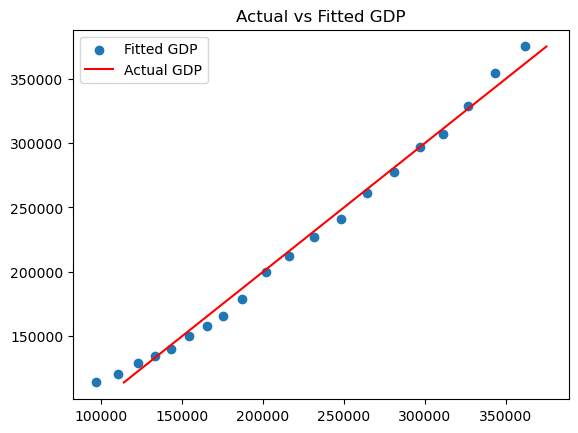

In [5]:
gdp_data['fitted'] = results.fittedvalues
plot.scatter(gdp_data['fitted'], y, label='Fitted GDP')
plot.plot(y,y, color='red', label='Actual GDP')
plot.title('Actual vs Fitted GDP')
plot.legend()
plot.show()



In [6]:
np.random.seed(123)
gdp_data['pseudo_random'] = np.random.normal(loc=0, scale=1, size=len(gdp_data))

In [21]:
def simulate(X, y, df):
    u_t = t.rvs(df=df, size=len(y))
    y_sim = y + u_t
    model = sm.OLS(y_sim, X).fit()
    return(model)

all_residuals = []

dfs = [5, 10, 20, 25, 100]

models_t_dist = {df: simulate(X, y, df) for df in dfs}
models_t_dist

{5: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x16aa95290>,
 10: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x168051450>,
 20: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x168074150>,
 25: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x167fdc350>,
 100: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x167fe2550>}

In [13]:
#e
for df, model in models_t_dist.items():
    print(f"DF={df}, \nParameters:\n{model.params}")
    
print(f"True parameters \n{true_parameters}")

DF=5, 
Parameters:
const   -2.518110e+06
log_L    2.248738e+05
log_C   -1.208704e+04
dtype: float64
DF=10, 
Parameters:
const   -2.518172e+06
log_L    2.248680e+05
log_C   -1.207240e+04
dtype: float64
DF=20, 
Parameters:
const   -2.518131e+06
log_L    2.248683e+05
log_C   -1.207741e+04
dtype: float64
DF=25, 
Parameters:
const   -2.518133e+06
log_L    2.248723e+05
log_C   -1.208266e+04
dtype: float64
DF=100, 
Parameters:
const   -2.518108e+06
log_L    2.248716e+05
log_C   -1.208425e+04
dtype: float64
True parameters 
const   -2.518132e+06
log_L    2.248708e+05
log_C   -1.208071e+04
dtype: float64


In [308]:
#f
for df, model in models_t_dist.items():
    print(f"DF={df} \nVariance: \n{model.bse ** 2},")

DF=5 
Variance: 
const    3.113431e+10
log_L    7.366026e+08
log_C    2.922510e+09
dtype: float64,
DF=10 
Variance: 
const    3.113366e+10
log_L    7.365871e+08
log_C    2.922449e+09
dtype: float64,
DF=20 
Variance: 
const    3.113274e+10
log_L    7.365653e+08
log_C    2.922362e+09
dtype: float64,
DF=25 
Variance: 
const    3.113494e+10
log_L    7.366174e+08
log_C    2.922569e+09
dtype: float64,
DF=100 
Variance: 
const    3.113803e+10
log_L    7.366905e+08
log_C    2.922859e+09
dtype: float64,


In [312]:
parametric_se = results.bse

MC_se_beta0 = []
MC_se_beta1 = []
MC_se_beta2 = []

for df, model in models_t_dist.items():
    MC_se_beta0.append(model.bse[0])
    MC_se_beta1.append(model.bse[1])
    MC_se_beta2.append(model.bse[2])

avg_MC_se_beta0 = np.mean(MC_se_beta0)
avg_MC_se_beta1 = np.mean(MC_se_beta1)
avg_MC_se_beta2 = np.mean(MC_se_beta2)

print("Comparison of SEs:")
print(f"Parametric vs. Average Simulated SE for Intercept: {parametric_se[0]} vs. {avg_MC_se_beta0}")
print(f"Parametric vs. Average Simulated SE for Beta1: {parametric_se[1]} vs. {avg_MC_se_beta1}")
print(f"Parametric vs. Average Simulated SE for Beta2: {parametric_se[2]} vs. {avg_MC_se_beta2}")

Comparison of SEs:
Parametric vs. Average Simulated SE for Intercept: 176448.4029713722 vs. 176450.37543782181
Parametric vs. Average Simulated SE for Beta1: 27140.304052337928 vs. 27140.60744606819
Parametric vs. Average Simulated SE for Beta2: 54060.00745398434 vs. 54060.61177541302


dict_items([(5, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x281e37490>), (10, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x281e37ad0>), (20, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x281dd0210>), (25, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x281dd0550>), (100, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x281dd0f10>)])

In [101]:
for df, model in models_t_dist.items():
    print(f"DF={df}, 95% CI for Parameters: {model.conf_int(0.05)}")

DF=5, 95% CI for Parameters:                   0             1
const -2.890420e+06 -2.145908e+06
log_L  1.676088e+05  2.821254e+05
log_C -1.261234e+05  1.019790e+05
DF=10, 95% CI for Parameters:                   0             1
const -2.890391e+06 -2.145845e+06
log_L  1.676109e+05  2.821327e+05
log_C -1.261399e+05  1.019729e+05
DF=20, 95% CI for Parameters:                   0             1
const -2.890385e+06 -2.145858e+06
log_L  1.676131e+05  2.821321e+05
log_C -1.261378e+05  1.019693e+05
DF=25, 95% CI for Parameters:                   0             1
const -2.890406e+06 -2.145840e+06
log_L  1.676064e+05  2.821313e+05
log_C -1.261385e+05  1.019806e+05
DF=100, 95% CI for Parameters:                   0             1
const -2.890425e+06 -2.145868e+06
log_L  1.676099e+05  2.821335e+05
log_C -1.261385e+05  1.019779e+05


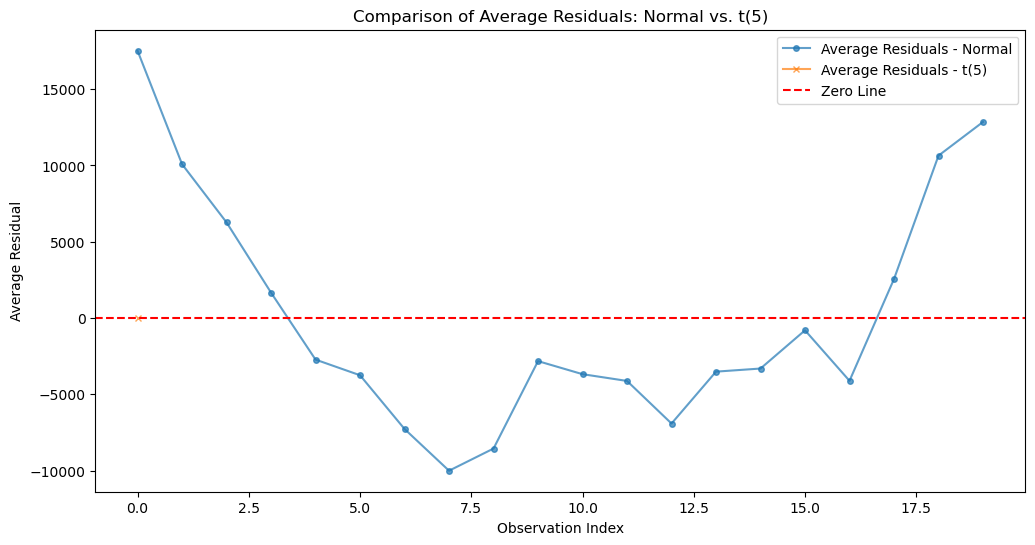

In [313]:
all_residuals = []

for df in dfs:
    model = simulate(X, y, df)
    residuals = model.resid
    all_residuals.append(residuals)
    
all_residuals_normal = []
std_dev = np.std(results.resid)
for _ in range(MC):  
    normal_errors = np.random.normal(loc=0, scale=std_dev, size=len(y))
    y_simulated_normal = y + normal_errors
    model_normal = sm.OLS(y_simulated_normal, X).fit()
    residuals_normal = model_normal.resid
    all_residuals_normal.append(residuals_normal)
    
average_residuals_t5 = np.mean(all_residuals[0], axis=0)
average_residuals_normal = np.mean(all_residuals_normal, axis=0)

all_residuals = np.array(all_residuals)

plot.figure(figsize=(12, 6))

plot.plot(average_residuals_normal, label='Average Residuals - Normal', alpha=0.7, linestyle='-', marker='o', markersize=4)

plot.plot(average_residuals_t5, label='Average Residuals - t(5)', alpha=0.7, linestyle='-', marker='x', markersize=4)

plot.axhline(y=0, color='r', linestyle='--', label='Zero Line')
plot.xlabel('Observation Index')
plot.ylabel('Average Residual')
plot.title('Comparison of Average Residuals: Normal vs. t(5)')
plot.legend()
plot.show()

In [14]:
r_squared_values = []
adjusted_r_squared_values = []

for df in dfs:
    for _ in range(100000):
        model = simulate(X, y, df)
        r_squared_values.append(model.rsquared)
        adjusted_r_squared_values.append(model.rsquared_adj)
        
average_r_squared = np.mean(r_squared_values)
average_adjusted_r_squared = np.mean(adjusted_r_squared_values)

print(f"Average R-squared: {average_r_squared}")
print(f"Average Adjusted R-squared: {average_adjusted_r_squared}")

Average R-squared: 0.9913253648713791
Average Adjusted R-squared: 0.9903048195621295


In [314]:
train = gdp_data[:-10]
test = gdp_data[-10:]

In [315]:
X1_train = sm.add_constant(train[['log_L','log_C']])
y1_train = train['income']

X1_test = sm.add_constant(test[['log_L','log_C']])
y1_test = test['income']

model_1 = sm.OLS(y1_train,X1_train).fit()
predictions_1 = model_1.predict(X1_test)

mse_1 = ((y1_test - predictions_1) ** 2).mean()
print(f"MSE for Model 1: {mse_1}")

X2_train = sm.add_constant(train[['labor','capital']])
y2_train = train['income']

X2_test = sm.add_constant(test[['labor','capital']])
y2_test = test['income']

model_2 = sm.OLS(y2_train,X2_train).fit()
predictions_2 = model_2.predict(X2_test)

mse_2 = ((y2_test - predictions_2) ** 2).mean()
print(f"MSE for Model 2: {mse_2}")

X3_train = sm.add_constant(train[['log_L','capital']])
y3_train = train['income']

X3_test = sm.add_constant(test[['log_L','capital']])
y3_test = test['income']

model_3 = sm.OLS(y3_train,X3_train).fit()
predictions_3 = model_3.predict(X3_test)

mse_3 = ((y3_test - predictions_3) ** 2).mean()
print(f"MSE for Model 3: {mse_3}")

X4_train= sm.add_constant(train[['labor','log_C']])
y4_train = train['income']

X4_test = sm.add_constant(test[['labor','log_C']])
y4_test = test['income']

model_4 = sm.OLS(y4_train, X4_train).fit()
predictions_4 = model_4.predict(X4_test)

mse_4 = ((y4_test - predictions_4)**2).mean()
print(f"MSE for Model 4: {mse_4}")

MSE for Model 1: 1812306775.8680854
MSE for Model 2: 92448940.45616288
MSE for Model 3: 972141750.5556567
MSE for Model 4: 64919212.927975774


In [168]:
def loocv_mse(X, y):
    loo = LeaveOneOut()
    mse_loocv = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_sm = sm.add_constant(X_train)
        X_test_sm = sm.add_constant(X_test)
        
        model = sm.OLS(y_train, X_train_sm).fit()
        predictions = model.predict(X_test_sm)
        
        mse_fold = ((y_test - predictions) ** 2).mean()
        mse_loocv.append(mse_fold)
    
    return np.mean(mse_loocv)

    

In [194]:
def loocv_mse(X, y):
    loo = LeaveOneOut()
    mse_loocv = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_sm = sm.add_constant(X_train)
        model = sm.OLS(y_train, X_train_sm).fit()
        
        if type(X_test) == pd.DataFrame:
            X_test_sm = sm.add_constant(X_test, has_constant='add')
        else:
            X_test_sm = pd.DataFrame([X_test.values], columns=X_test.index)
            X_test_sm = sm.add_constant(X_test_sm, has_constant='add')

        predictions = model.predict(X_test_sm)
        
        mse_fold = ((y_test - predictions) ** 2).mean()
        mse_loocv.append(mse_fold)
    
    return np.mean(mse_loocv)



In [316]:
y = gdp_data['income']

X1 = gdp_data[['log_L', 'log_C']]

X2 = gdp_data[['labor', 'capital']]

X3 = gdp_data[['log_L', 'capital']]

X4 = gdp_data[['labor', 'log_C']]

mse_model_1 = loocv_mse(X1, y)
mse_model_2 = loocv_mse(X2, y)
mse_model_3 = loocv_mse(X3, y)
mse_model_4 = loocv_mse(X4, y)

In [317]:
summary_table = pd.DataFrame({
    'Model': ['Model 1 (M1)', 'Model 2 (M2)', 'Model 3 (M3)', 'Model 4 (M4)'],
    'Average MSE LOOCV': [mse_model_1, mse_model_2, mse_model_3, mse_model_4],
    'Conventional Validation MSE' : [mse_1, mse_2, mse_3, mse_4]
})

print(summary_table)

          Model  Average MSE LOOCV  Conventional Validation MSE
0  Model 1 (M1)       1.049176e+08                 1.812307e+09
1  Model 2 (M2)       7.066423e+07                 9.244894e+07
2  Model 3 (M3)       8.396225e+07                 9.721418e+08
3  Model 4 (M4)       2.979153e+07                 6.491921e+07


In [318]:
f_2 = KFold(n_splits=2, shuffle=True)
mse_kfold_2 = []

for train_index, test_index in kf_2.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = sm.OLS(y_train, X_train).fit()

    predictions = model.predict(X_test)

    mse_fold = ((y_test - predictions) ** 2).mean()
    mse_kfold_2.append(mse_fold)

average_mse_kfold_2 = np.mean(mse_kfold_2)
print(f"Average MSE for 2-fold Cross-Validation: {average_mse_kfold_2}")

kf_4 = KFold(n_splits=4, shuffle=True)
mse_kfold_4 = []

for train_index, test_index in kf_4.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = sm.OLS(y_train, X_train).fit()

    predictions = model.predict(X_test)

    mse_fold = ((y_test - predictions) ** 2).mean()
    mse_kfold_4.append(mse_fold)

average_mse_kfold_4 = np.mean(mse_kfold_4)
print(f"Average MSE for 4-fold Cross-Validation: {average_mse_kfold_4}")

Average MSE for 2-fold Cross-Validation: 107117114.5636501
Average MSE for 4-fold Cross-Validation: 140298902.1723857


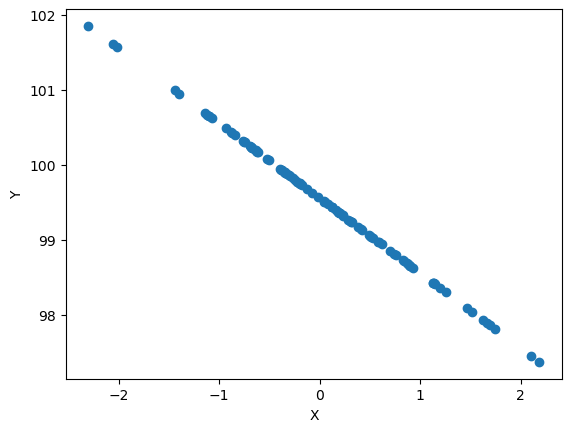

In [205]:
np.random.seed(1)
x=np.random.normal(size=100)
y = x - 2 * x + np.random.normal(100)
plot.scatter(x, y)
plot.xlabel('X')
plot.ylabel('Y')
plot.show()

In [212]:
data = pd.DataFrame({'X': x, 'Y': y})
formulas = ['Y ~ X', 'Y ~ X + np.power(X, 2)', 'Y ~ X + np.power(X, 2) + np.power(X, 3)', 'Y ~ X + np.power(X, 2) + np.power(X, 3) + np.power(X, 4)']
def loocv_error(data, formula):
    loo = LeaveOneOut()
    mse_loocv = []
    
    for train_index, test_index in loo.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]
        model = sm.OLS.from_formula(formula, data=train_data).fit()
        predictions = model.predict(test_data)
        mse_fold = ((test_data['Y'] - predictions) ** 2).mean()
        mse_loocv.append(mse_fold)
    return np.mean(mse_loocv)
loocv_errors = [loocv_error(data, formula) for formula in formulas],
loocv_errors

([6.724881444828082e-28,
  2.8555502591552275e-27,
  3.64112950301052e-27,
  5.201786674350802e-26],)

In [319]:
np.random.seed(2)

x_new = np.random.normal(size=100)
y_new = x_new - 2 * x_new**2 + np.random.normal(size=100)

data_new = pd.DataFrame({'X': x_new, 'Y': y_new})
loocv_errors_new = [loocv_error(data_new, formula) for formula in formulas]

loocv_errors_new

[11.610208269693626,
 1.2652839413336214,
 1.2820418215169616,
 1.3165915804276833]

In [218]:
col_data = pd.read_csv('correl_pop.csv')

In [224]:
correlations = []
sample_sizes = [40, 30, 20, 10, 5]

for i in sample_sizes:
    sample_corrs = []
    for _ in range(1000):
        bootstrap_sample = col_data.sample(n=size, replace=True)
        corr = bootstrap_sample['SAT'].corr(bootstrap_sample['GPA'])
        sample_corrs.append(corr)
    correlations.append(np.mean(sample_corrs))
    
for size, corr in zip(sample_sizes, correlations):
    print(f'Sample Size: {size}, Average Correlation: {corr}')

Sample Size: 40, Average Correlation: 0.7121967148908468
Sample Size: 30, Average Correlation: 0.7010121198724995
Sample Size: 20, Average Correlation: 0.7173445054539648
Sample Size: 10, Average Correlation: 0.7173795755741276
Sample Size: 5, Average Correlation: 0.7015615680438655


In [225]:
for size, corrs in zip(sample_sizes, correlations):
    quantiles = np.quantile(corrs, [0.01, 0.05, 0.1, 0.9, 0.95, 0.99])
    print(f'Sample Size: {size}, Quantiles: {quantiles}')

Sample Size: 40, Quantiles: [0.71219671 0.71219671 0.71219671 0.71219671 0.71219671 0.71219671]
Sample Size: 30, Quantiles: [0.70101212 0.70101212 0.70101212 0.70101212 0.70101212 0.70101212]
Sample Size: 20, Quantiles: [0.71734451 0.71734451 0.71734451 0.71734451 0.71734451 0.71734451]
Sample Size: 10, Quantiles: [0.71737958 0.71737958 0.71737958 0.71737958 0.71737958 0.71737958]
Sample Size: 5, Quantiles: [0.70156157 0.70156157 0.70156157 0.70156157 0.70156157 0.70156157]


In [232]:
sample_size = 18
bootstrap_corrs = []

for _ in range(1000):
    bootstrap_sample = col_data.sample(n=sample_size, replace=True)
    corr = bootstrap_sample['SAT'].corr(bootstrap_sample['GPA'])
    bootstrap_corrs.append(corr)

rho_null = 0.75
t_stat, p_value = st.ttest_1samp(bootstrap_corrs, rho_null)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

conf_interval = np.quantile(bootstrap_corrs, [0.025, 0.975])
print(f"95% Confidence Interval: {conf_interval}")

T-statistic: -1.054363554195771, P-value: 0.29197143259246516
95% Confidence Interval: [0.47465726 0.91855848]


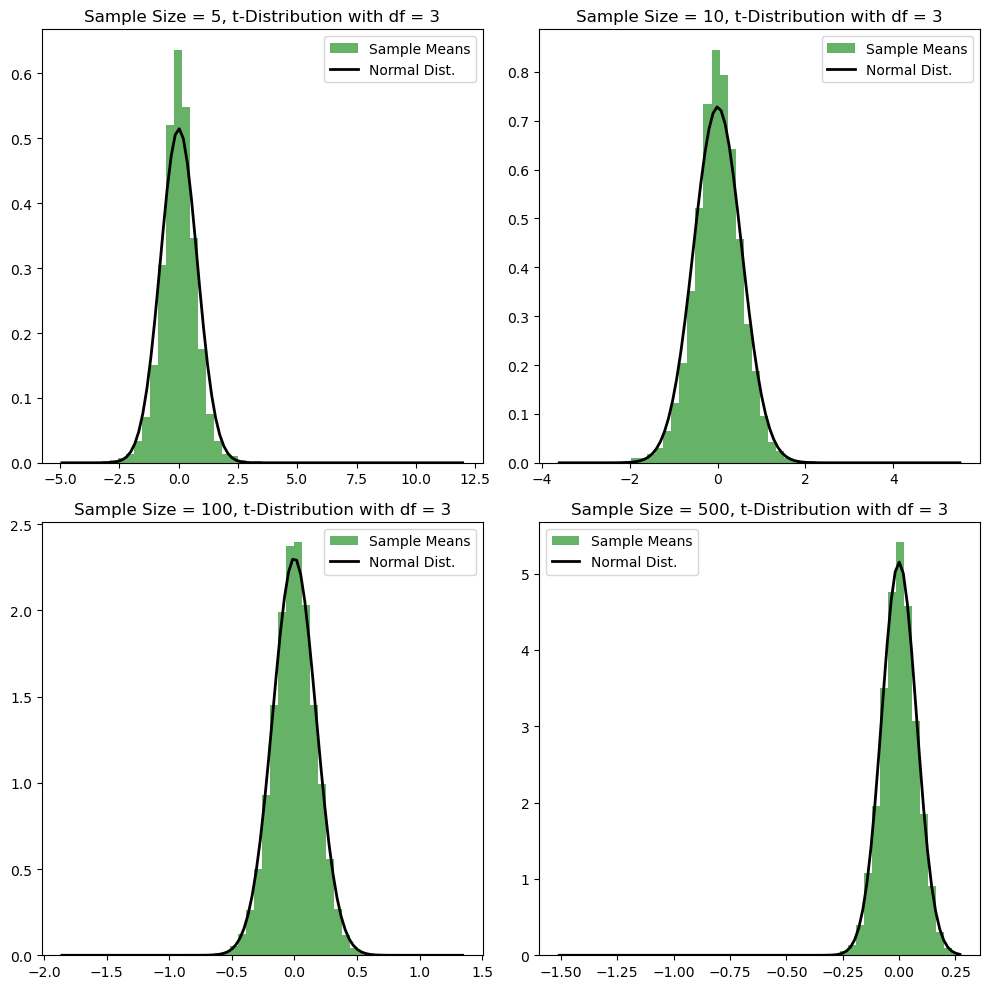

In [252]:
def clt(df, sample_sizes):
    plot.figure(figsize=(10, 10))

    subplot_position = 1

    for sample_size in sample_sizes:
        sample_means = [np.mean(t.rvs(df=df, size=sample_size)) for _ in range(10000)]
        
        ax = plot.subplot(2, 2, subplot_position)
        
        ax.hist(sample_means, bins=50, density=True, alpha=0.6, color='g', label='Sample Means')
        
        if df > 2:
            std_error = np.sqrt(df / (df - 2) / sample_size)
            x_vals = np.linspace(min(sample_means), max(sample_means), 100)
            ax.plot(x_vals, st.norm.pdf(x_vals, 0, std_error), 'k', linewidth=2, label='Normal Dist.')
        
        ax.set_title(f'Sample Size = {sample_size}, t-Distribution with df = {df}')
        ax.legend()

        subplot_position += 1
    
    plot.tight_layout()
    plot.show()

df = 3
sample_sizes = [5, 10, 100, 500]

clt(df, sample_sizes)

In [266]:
main_distribution = {
    "Uniform": {"mean": 0.5, "variance": 1 / 12},
    "Exponential": {"mean": 1, "variance": 1},
    "Beta": {"mean": 0.2857, "variance": 0.01905},
    "Normal": {"mean": 0, "variance": 1},
    "Poisson": {"mean": 3, "variance": 3}
}

In [268]:
main_distribution.items()

dict_items([('Uniform', {'mean': 0.5, 'variance': 0.08333333333333333}), ('Exponential', {'mean': 1, 'variance': 1}), ('Beta', {'mean': 0.2857, 'variance': 0.01905}), ('Normal', {'mean': 0, 'variance': 1}), ('Poisson', {'mean': 3, 'variance': 3})])

In [ ]:
np.random.choice()